In [1]:
%pip install -qU pypdf langchain-community langchain-text-splitters

Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = "./income_tax.pdf"
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [3]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2026-01-07T09:03:24+09:00', 'moddate': '2026-01-07T09:03:24+09:00', 'source': './income_tax.pdf', 'total_pages': 137, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n1. 비치ㆍ기록한 장부에 의하여 신고하여야 할 소득금액의 100분의 20 이상을 누락하여 신고한 경우\n2. 기장세액공제와 관련된 장부 및 증명서류를 해당 과세표준확정신고기간 종료일부터 5년간 보관하지 아니한 경\n우. 다만, 천재지변 등 대통령령으로 정하는 부득이한 사유에 해당하는 경우에는 그러하지 아니하다.\n③ 기장세액공제에 관하여 필요한 사항은 대통령령으로 정한다.\n[전문개정 2009. 12. 31.]\n \n제56조의3(전자계산서 발급 전송에 대한 세액공제) ① 총수입금액 등을 고려하여 대통령령으로 정하는 사업자가 제\n163조제1항 후단에 따른 전자계산서를 2027년 12월 31일까지 발급(제163조제8항에 따라 전자계산서 발급명세를\n국세청장에게 전송하는 경우로 한정한다)하는 경우에는 전자계산서 발급 건수 등을 고려하여 대통령령으로 정하는\n금액을 해당 과세기간의 사업소득에 대한 종합소득산출세액에서 공제할 수 있다. 이 경우 공제한도는 연간 100만원\n으로 한다. <개정 2021. 12. 8., 2024. 12. 31.>\n② 제1항에 따른 세액공제를 적용받으려는 사업자는 제70조 또는 제74조에 따른 과세표준확정신고를 할 때 재정경\n제부령으로 정하는 

In [4]:
%pip install -U pyzerox pdf2image pillow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyzerox (from versions: none)
ERROR: No matching distribution found for pyzerox


In [5]:
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
%pip install -q nest_asyncio

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from pyzerox import zerox
import os
import json
import asyncio
os.environ["PATH"] = r"E:\poppler\Library\bin" + ";" + os.environ["PATH"]

## placeholder for additional model kwargs which might be required for some models
kwargs = {}

## system prompt to use for the vision model
custom_system_prompt = None

###################### Example for OpenAI ######################
model = "gpt-4o-mini" ## openai model


###################### For other providers refer: https://docs.litellm.ai/docs/providers ######################

# Define main async entrypoint
async def main():
    file_path = "./income_tax.pdf" ## local filepath and file URL supported

    ## process only some pages or all
    select_pages = None ## None for all, but could be int or list(int) page numbers (1 indexed)

    output_dir = "./document" ## directory to save the consolidated markdown file
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt,select_pages=select_pages, **kwargs)
    return result


# run the main function:
result = asyncio.run(main())

# result가 문자열(마크다운)인 경우가 많음
if isinstance(result, str):
    md_path = "./document/result.md"
    with open(md_path, "w", encoding="utf-8") as f:
        f.write(result)
    print(result[:2000])  # 너무 길면 앞부분만
    print(f"\n✅ saved: {md_path}")

# result가 dict/list 등 구조화된 형태일 수도 있으니 안전 처리
else:
    import json
    json_path = "./document/result.json"
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(result, f, ensure_ascii=False, indent=2)
    print(str(result)[:2000])
    print(f"\n✅ saved: {json_path}")

In [10]:
%pip install -q "unstructured[md]" nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=100,
    separators=["\n\n", "\n"],
)

In [12]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document

markdown_path = "./document/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [13]:
document_list[43]

Document(metadata={'source': './document/income_tax.md'}, page_content='간접투자자에게 지급자에 해당하여 제6조제1항 및 제57조제1항 제1호에 따른 국외법인에 해당하는 개인으로서 간접투자사업이 발생하는 것을 제외하는 구조로 투자적으로 보낼 것 다른 자본사업으로 납부할 것은 규정의 범위에 따라 외국법인에서의 경우 해당 세액을 포함하며, 이하 제1항에서 ‘간접투자외국세액’이라 한다.\n\n제1항을 적용할 때 거주자가 간접투자회사를 통해 지급받은 소득과 종합소득세법에 의해 공제되는 금액은 다음과 같이 한다.\n\n간접투자회사로부터 지급받은 소득: ‘자본시장과 금융투자업에 관한 법률’ 제23조제6항에 따른 기초자산(간접투자와의별임이나 대체가격)을 말하며, 이하 이 조 및 제29조제1항에서 “세액기준가격”이라 한다)기준으로 계산된 금액. 단, 증권시장에서 상장된 간접투자회사의 중립에 따라 간접투자회사의 지급받은 소득은 대통형별로 판단하여 계산한 금액으로 한다.\n\n종합소득산출세액에서 공제하는 금액: 간접투자국법인에서 세후기준가격을 고려하여 대통형별로 정하는 범위에 따라 계산한 금액\n\n제3항에 따라 종합소득산출세액에서 공제할 수 있는 금액은 다음 금액과 이하 함을 “공제한도금액”이라 한다. 이 경우 제1항제2호의 금액에 해당 하는 금액은 다음 과세기간은 개시일부터 10년 이내에 거쳐있는 과세기간으로 이힐여 그의 이월된 과세기간의 공제한도금액 내에 공제할 수 있다.\n\n공제한도금액 = A\n\n      B\n\nA: 제65조에 따라 계산한 당해 과세기간의 종합소득산출세액 B: 간접투자회사로부터 지급받은 소득(상기금액에 대해 간접투자국법인)\n\n제1항부터 제3항까지의 규정에 따른 간접투자회사 등으로부터 지급받은 소득의 계산방법, 그 밖에 세액공제에 필요한 사항은 대통령령으로 정한다. [본조신설 2022. 1. 31.] [시행일: 2022. 1. 1.] 제57조의2\n\n제58조(자산손실세액의귀증) 1. 사업

In [14]:
%pip install markdown html2text beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [15]:
import markdown
from bs4 import BeautifulSoup

with open("./document/income_tax.md", 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

html_content = markdown.markdown(md_content)

soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

with open("./document/income_tax.txt", 'w', encoding='utf-8') as text_file:
    text_file.write(text_content)

print("Markdown converted to plain text and saved to income_tax.txt")

Markdown converted to plain text and saved to income_tax.txt


In [16]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./document/income_tax.txt", encoding="utf-8")
document_list = loader.load_and_split(text_splitter)

In [17]:
document_list[42]

Document(metadata={'source': './document/income_tax.txt'}, page_content='환산급여에 따라 정한 다음의 금액\n\n| 환산금여        | 공 제 악                |\n|----------------|------------------------|\n| 8백만원 이하     | 환산금여의 10퍼센트       |\n| 8백만원 초과 7백만원 이하 | 8백만원×(8백만원 초과분의 60퍼센트)  |\n| 7백만원 초과 1억원 이하 | 4천520만원×(7백만원 초과분의 55퍼센트) |\n| 1억원 초과 3억원 이하 | 6천170만원×(1억원 초과분의 45퍼센트)  |\n| 3억원 초과      | 1억5천170만원+(3억원 초과분의 35퍼센트) |\n② 해당 과세기간의 퇴직소득금액이 제1항제1호에 따른 공제금액에 미달하는 경우에는 그 퇴직소득금액을 공제액으로 한다. <개정 2014. 12. 23.>\n③ 제1항과 제2항에 따른 공제를 \'퇴직소득공제\'라 한다.\n④ 퇴직소득금액 계산 방법에 필요한 사항은 대통령령으로 정한다. <개정 2013. 1. 1.>\n[전문개정 2009. 12. 31.]\n제49조 삭제 <2006. 12. 30.>\n제관 종합소득공제 <개정 2009. 12. 31.>\n제50조(가난공제)\n가. 종합소득이 있는 거주자(자연인인 해외단체)에 대해서는 다음 각 호의 어느 하나에 해당하는 사람의 수에 1명당 연 150만 원을 곱하여 계산한 금액을 그 거주자의 해당 과세기간의 종합소득금액에서 공제한다. <개정 2015. 12. 15.>\n\n거주자\n\n거주자가 배우자로서 해당 과세기간의 소득금액이 없거나 해당 과세기간의 소득금액 합계가 100만원 이하인 사람(종합소득이 500만원 이하인 근로소득 있는 배우자를 포함한다)\n\n\n거주자와 배우자를 포함한다. 이하 이 호에서 갈과 생계를 같이 하는 다음 각 목의 어느 하나에 해당하는 부양가족(제15조제1항제3호와같이 장애인에 해

In [18]:
%pip install -q langchain_chroma

Note: you may need to restart the kernel to use updated packages.


In [19]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [20]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
  documents=document_list,
  embedding=embeddings,
  collection_name="income_tax_collection",
  persist_directory="./income_tax_collection"
)

In [21]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

In [22]:
query = '연봉 5천만원인 직장인의 소득세는?'

In [23]:
retriever.invoke(query)

[Document(id='4eabc96b-a096-42d9-8569-ab72bbdd783e', metadata={'source': './document/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
 Document(id='31be3385-3e1d-416e-a3e6-a56b26c19eec', metadata={'source': './document/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n

In [24]:
from typing_extensions import List, TypedDict

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [25]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [26]:
def retrieve(state: AgentState):
    query = state["query"]
    docs = retriever.invoke(query)
    return {"context": docs}

In [28]:
from langsmith import Client
from langchain_openai import ChatOpenAI

client = Client()
prompt = client.pull_prompt("rlm/rag-prompt", include_model=True)
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [29]:
def generate(state: AgentState):
    context = state["context"]
    query = state["query"]
    rag_chain = prompt | llm
    response = rag_chain.invoke({"context": context, "question": query})
    return {"answer": response}

In [30]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [31]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [33]:
graph = graph_builder.compile()

In [34]:
%pip install -qU IPython

Note: you may need to restart the kernel to use updated packages.


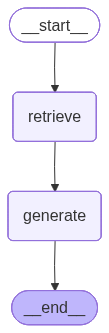

In [38]:
from IPython.display import Image, display

png_bytes = graph.get_graph().draw_mermaid_png()
display(Image(data=png_bytes))

In [41]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [44]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [45]:
sequence_graph = sequence_graph_builder.compile()

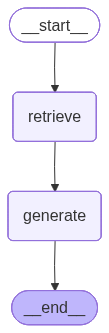

In [46]:
from IPython.display import Image, display

png_bytes = graph.get_graph().draw_mermaid_png()
display(Image(data=png_bytes))

In [47]:
initial_state = {"query": query}
graph.invoke(initial_state)

{'query': '연봉 5천만원인 직장인의 소득세는?',
 'context': [Document(id='4eabc96b-a096-42d9-8569-ab72bbdd783e', metadata={'source': './document/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
  Document(id='31be3385-3e1d-416e-a3e6-a56b26c19eec', metadata={'source': './document/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입